# Behaviourplots
KPI:
- Cost of Illness
- Contaminated chicken meat
- DALY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")
import matplotlib.patches as mpatches

In [2]:
# What scenarios do u want plotted?
scenarios = ["base", "12"]

In [3]:
#What's the name of ur file?
loc = "fe_data"

In [4]:
#What's ur policy called?
policy = "Fly exposure"

## Everything below only needs to be run

In [5]:
namedict = {"base": "base",
            "1": "fart1",
            "2": "fart2",
            "3": "fart3",
            "4": "fart4",
            "5": "fart5",
            "6": "fart6",
            "7": "fart7",
            "8": "fart8",
            "9": "fart9",
            "10": "fart10",
            "11": "fart11",
            "12": "fart12"}

In [6]:
location = "../data/" + loc + ".txt"

data_df = pd.read_csv(location, delimiter="\t", dtype="string")

In [7]:
data_df = data_df.iloc[:, :-1]

In [8]:
# Ok, so as we all know Python is retarded when it comes to memory allocation, which means we have to resort ugly constructs like this
# C++ for the win
temp = data_df.iloc[:, 1:].applymap(lambda value: float(value.replace("M",'')) * 1000000 if "M" in value else value)

In [9]:
temp = temp.apply(pd.to_numeric)

In [10]:
data_df = pd.concat([data_df.iloc[:, 0], temp], axis=1)

In [11]:
data_df.set_index("Date", inplace=True)

## Cost of Illness

In [12]:
coi_df = pd.DataFrame(data_df.loc[data_df.index.str.contains("Cost of Illness")])

In [13]:
coi_df = coi_df.loc[coi_df.index.str.split("_").str[-1].isin(scenarios)].T

In [14]:
coi_df.columns = coi_df.columns.to_series().apply(lambda value: namedict[value.split("_")[-1]])

So the following code cell takes forever because the dataset is huuuuUUUUGEEEEEE. Still need to fix that

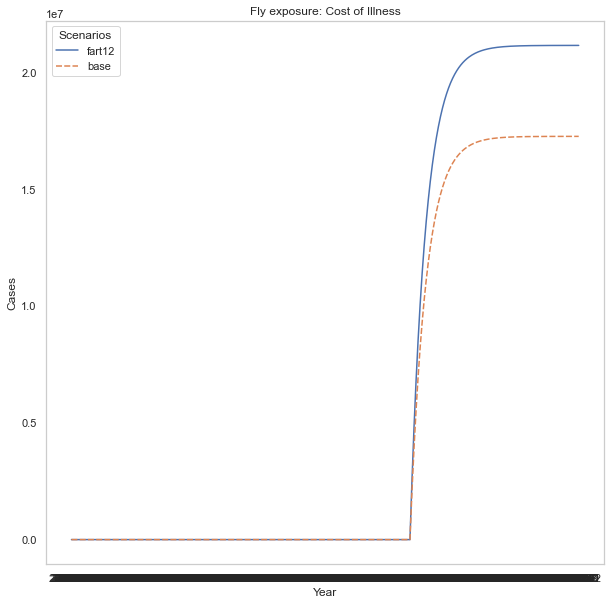

In [15]:
fig, ax = plt.subplots(figsize = (10,10)) 

sns.lineplot(data=coi_df[500:1000])

plt.xlabel('Year'); plt.ylabel('Cases')
plt.title(policy + ': Cost of Illness')
plt.legend(title="Scenarios")
ax.grid(False)

plt.savefig("../images/" + loc[:2] + "_coi.png", dpi=300, bbox_inches='tight')
plt.show()